# Program 3

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [2]:
df=pd.read_csv('P3_Weather.csv')

C:\Users\Sonal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

STA              int64
Date            object
Precip          object
WindGustSpd    float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall        object
PoorWeather     object
YR               int64
MO               int64
DA               int64
PRCP            object
DR             float64
SPD            float64
MAX            float64
MIN            float64
MEA            float64
SNF             object
SND            float64
FT             float64
FB             float64
FTI            float64
ITH            float64
PGT            float64
TSHDSBRSGF      object
SD3            float64
RHX            float64
RHN            float64
RVG            float64
WTE            float64
dtype: object

In [5]:
for c in df.columns:
    print(c,'--',df[c].isna().sum())

STA -- 0
Date -- 0
Precip -- 0
WindGustSpd -- 118508
MaxTemp -- 0
MinTemp -- 0
MeanTemp -- 0
Snowfall -- 1163
PoorWeather -- 84803
YR -- 0
MO -- 0
DA -- 0
PRCP -- 1932
DR -- 118507
SPD -- 118508
MAX -- 474
MIN -- 468
MEA -- 498
SNF -- 1163
SND -- 113477
FT -- 119040
FB -- 119040
FTI -- 119040
ITH -- 119040
PGT -- 118515
TSHDSBRSGF -- 84803
SD3 -- 119040
RHX -- 119040
RHN -- 119040
RVG -- 119040
WTE -- 119040


In [6]:
df.shape

(119040, 31)

In [7]:
df= df.drop(['WindGustSpd', 'PoorWeather', 'DR', 'SPD', 'SND','FT','FB','FTI','ITH','PGT','TSHDSBRSGF',
                       'SD3','RHX','RHN','RVG','WTE'],axis=1)

In [8]:
df.shape

(119040, 15)

In [9]:
for c in df.columns:
    print(c,'--',df[c].isna().sum())

STA -- 0
Date -- 0
Precip -- 0
MaxTemp -- 0
MinTemp -- 0
MeanTemp -- 0
Snowfall -- 1163
YR -- 0
MO -- 0
DA -- 0
PRCP -- 1932
MAX -- 474
MIN -- 468
MEA -- 498
SNF -- 1163


In [10]:
import matplotlib.pyplot as plt
df.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

<Figure size 640x480 with 1 Axes>

# Simple Linear Regression

In [11]:
X = df['MinTemp'].values.reshape(-1,1)
y = df['MaxTemp'].values.reshape(-1,1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
print(lr.intercept_)
print(lr.coef_)

[10.66185201]
[[0.92033997]]


In [15]:
#Equation will be max_temp=0.92033997* min_temp + 10.66185201
#y=mx+c

In [16]:
y_pred=lr.predict(X_test)

In [17]:
y_test,y_pred

(array([[28.88888889],
        [31.11111111],
        [27.22222222],
        ...,
        [31.11111111],
        [31.11111111],
        [36.66666667]]), array([[33.67035117],
        [30.0912513 ],
        [26.51215143],
        ...,
        [32.64775121],
        [30.60255128],
        [31.62515124]]))

In [18]:
lr.predict([[20]])

array([[29.06865134]])

In [19]:
m_df=pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [20]:
m_df

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


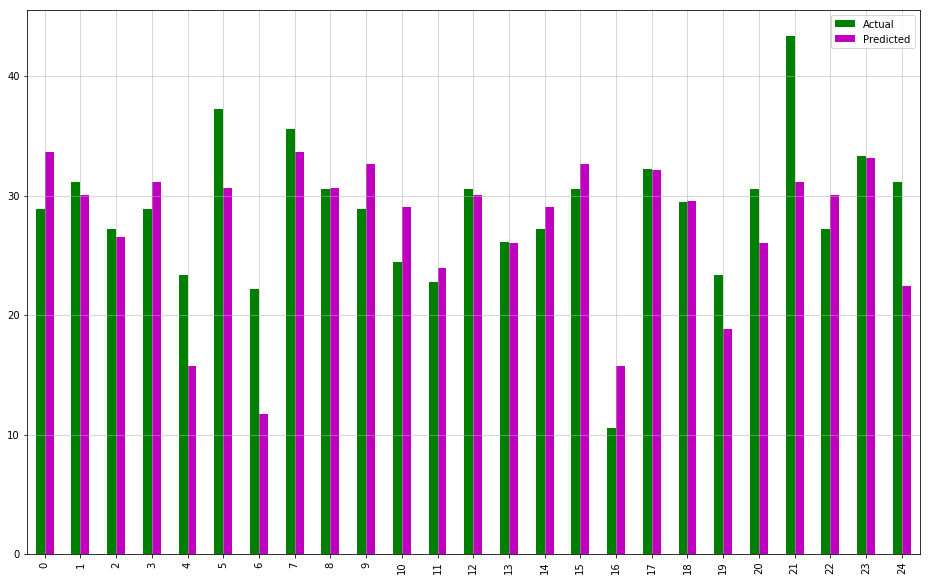

In [21]:
m_df.head(25).plot(kind='bar',color='gm',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.show()

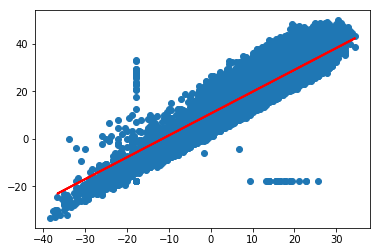

In [22]:
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

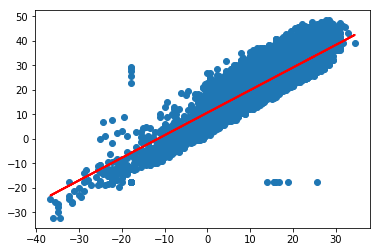

In [23]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1993291783785285
Mean Squared Error: 17.631568097568444
Root Mean Squared Error: 4.198996082109204


# Multiple Linear Regression 

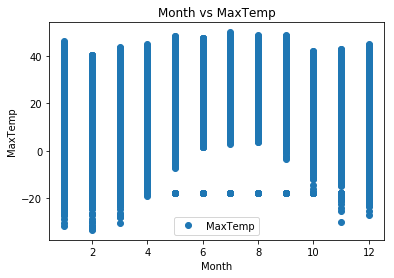

In [25]:
import matplotlib.pyplot as plt
df.plot(x='MO', y='MaxTemp', style='o')  
plt.title('Month vs MaxTemp')  
plt.xlabel('Month')  
plt.ylabel('MaxTemp')  
plt.show()

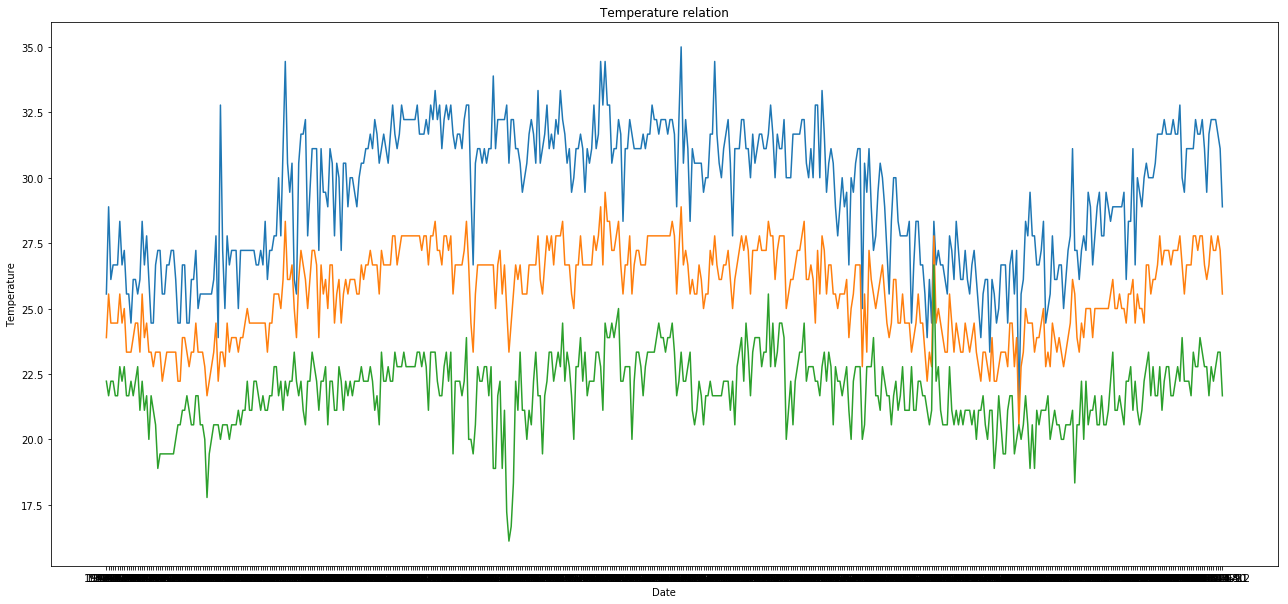

In [26]:
plt.figure(figsize=(22,10))
plt.plot(df["Date"][:500],df["MaxTemp"][:500])
plt.plot(df["Date"][:500],df["MeanTemp"][:500])
plt.plot(df["Date"][:500],df["MinTemp"][:500])
plt.title("Temperature relation")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

In [27]:
df['Precip']=pd.to_numeric(df['Precip'],errors='coerce')

In [28]:
df['Precip']

0         1.016
1         0.000
2         2.540
3         2.540
4         0.000
          ...  
119035    0.000
119036    9.906
119037    0.000
119038    0.000
119039    0.000
Name: Precip, Length: 119040, dtype: float64

In [29]:
df.dropna(subset=['MinTemp','MO','MeanTemp','Precip'],inplace=True)

In [30]:
#Multiple Linear Regression
n_X=df[['MinTemp','MO','MeanTemp','Precip']]
n_y=df['MaxTemp']

In [31]:
nX_train, nX_test, ny_train, ny_test = train_test_split(n_X, n_y, test_size=0.2, random_state=0)

In [32]:
n_lr = LinearRegression()
n_lr.fit(nX_train, ny_train)

LinearRegression()

In [33]:
print(n_lr.intercept_)
print(n_lr.coef_)

0.9008561086174076
[-0.86378141 -0.00216864  1.85445532 -0.00508113]


In [34]:
n_lr.predict([[20,11,25,1.2]])

array([29.95665841])

In [35]:
#y=intercept+a*x1+b*x2+c*x3+d*x4

In [36]:
ny_pred=n_lr.predict(nX_test)

In [37]:
ny_pred,ny_test

(array([21.44250569, 24.17644814, 10.69748345, ..., 31.2084209 ,
        21.42298795, 27.02166311]), 89090     22.222222
 88867     25.555556
 89710     11.111111
 88903     33.333333
 110999    32.777778
             ...    
 81656     25.555556
 99765     26.111111
 25238     31.111111
 82545     21.111111
 111950    27.222222
 Name: MaxTemp, Length: 20458, dtype: float64)

In [38]:
m_df=pd.DataFrame({'Actual': ny_test, 'Predicted': ny_pred})

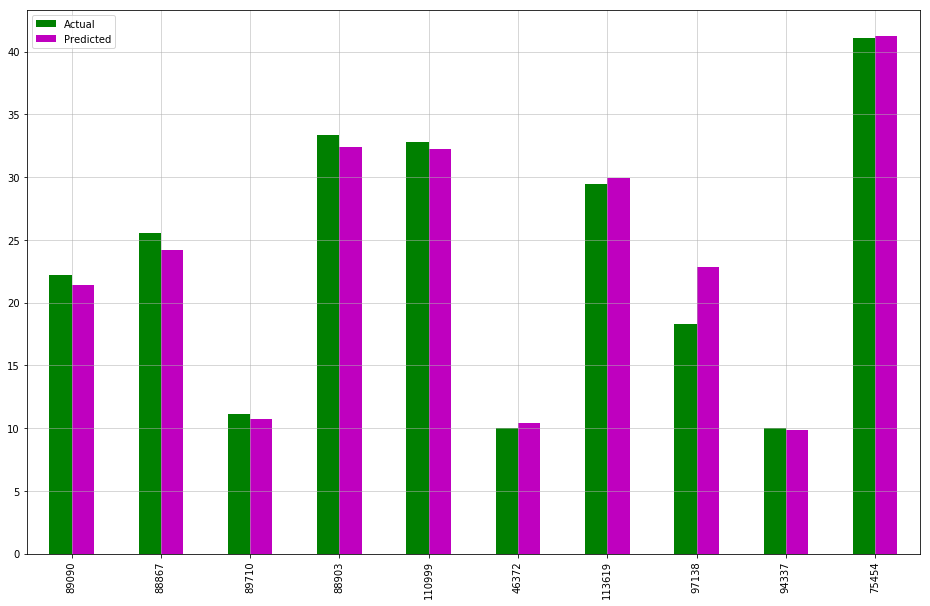

In [39]:
m_df.head(10).plot(kind='bar',color='gm',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.show()

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ny_test, ny_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ny_test, ny_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ny_test, ny_pred)))

Mean Absolute Error: 0.4165787663072768
Mean Squared Error: 1.1047876587504348
Root Mean Squared Error: 1.0510887967961768


In [41]:
from sklearn.metrics import roc_auc_score


lr_probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

AttributeError: 'LinearRegression' object has no attribute 'predict_proba'

In [ ]:
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)

